# Lab 6: Graphs II

Lab associated with Module 6: Graphs II

***

In [289]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\benny\AppData\Local\Temp\ipykernel_22896\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [290]:
import numpy as np

In [291]:
import math

In [292]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [293]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        return v in self.outNeighbors
        
    def hasInNeighbor(self, v):
        
        return v in self.inNeighbors
    
    def hasNeighbor(self, v):
        
        return v in self.inNeighbors or v in self.outNeighbors
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [294]:
class Graph:
    def __init__(self):
        self.vertices = []
        self.next_index = 0 # Add this line to initialize the next available index

    def addVertex(self, n):
        n.index = self.next_index # Assign the next available index to the vertex
        self.next_index += 1 # Increment the next available index
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a, b in self.getDirEdges():
            ret += "(" + str(a) + "->" + str(b[0]) + " , " + str(b[1]) + ")) "
        ret += "\n"
        return ret


Now that we have incorporated the weights, let us devise a plan to generate the graph

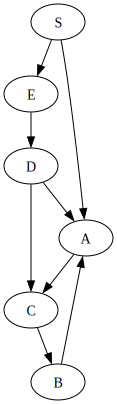

In [295]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [296]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [297]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [298]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [299]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S->A , 3)) (S->B , 4)) (B->A , -2)) 



***

### Section 2: Dijkstra Algorithm

In [300]:
len(G.vertices)

3

In [301]:
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf

    w.estD = 0
    unsureVertices = G.vertices[:]

    sureVertices = []

    while len(unsureVertices) > 0:

        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x

        if u is None:
            # then there is nothing more that I can reach
            return

        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():

            if v in sureVertices:
                continue

            if u.estD + wt < v.estD:
                v.estD = u.estD + wt

        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [302]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 4


***

### <font color='red'> Activity 1: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [303]:
def bellman_ford(source, graph):
    """ Input: source node and graph
        Output: dictionary of distances from source to each node
        Note: if there is a negative-weight cycle, returns None
    """

    for node in graph.vertices:
        node.estD = float('inf')
    source.estD = 0

    for _ in range(len(graph.vertices) - 1):
        for u in graph.vertices:  # for each node u
            for v, w in u.getOutNeighbors():  # for each out-neighbor v of u with weight w
                if u.estD != float('inf') and u.estD + w < v.estD:
                    v.estD = u.estD + w

    # Check for negative-weight cycles
    for u in graph.vertices:
        for v, w in u.getOutNeighbors():
            if u.estD != float('inf') and u.estD + w < v.estD:
                print("Graph contains a negative-weight cycle")
                return None

    return {node: node.estD for node in graph.vertices}


#### Test Case 1: Simple Connected Graph

In [304]:
G = Graph()
for i in ['A', 'B', 'C']:
    G.addVertex(Node(i))

V = G.vertices

G.addDiEdge(V[0], V[1], 1)
G.addDiEdge(V[1], V[2], 2)
G.addDiEdge(V[0], V[2], 4)

distances = bellman_ford(V[0], G)

print("Distance from A to A:", distances[V[0]])
print("Distance from A to B:", distances[V[1]])
print("Distance from A to C:", distances[V[2]])

Distance from A to A: 0
Distance from A to B: 1
Distance from A to C: 3


#### Test Case 2: Graph with Negative Weights

In [305]:
G = Graph()
for i in ['A', 'B', 'C']:
    G.addVertex(Node(i))

V = G.vertices

G.addDiEdge(V[0], V[1], -1)
G.addDiEdge(V[1], V[2], 2)
G.addDiEdge(V[0], V[2], 4)

distances = bellman_ford(V[0], G)

print("Distance from A to A:", distances[V[0]])
print("Distance from A to B:", distances[V[1]])
print("Distance from A to C:", distances[V[2]])

Distance from A to A: 0
Distance from A to B: -1
Distance from A to C: 1


#### Test Case 3: Graph with Negative Cycle

In [306]:
G = Graph()
for i in ['A', 'B', 'C']:
    G.addVertex(Node(i))

V = G.vertices

G.addDiEdge(V[0], V[1], 1)
G.addDiEdge(V[1], V[2], 2)
G.addDiEdge(V[2], V[0], -4)

distances = bellman_ford(V[0], G)

if distances is not None:
    print("Distance from A to A:", distances[V[0]])
    print("Distance from A to B:", distances[V[1]])
    print("Distance from A to C:", distances[V[2]])

Graph contains a negative-weight cycle


***

#### I learnt Unit Testing!!

### Test Case 1 - Positive Weights

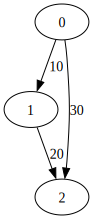

In [313]:
dot1 = Digraph()
dot1.edge('0', '1', label='10')
dot1.edge('1', '2', label='20')
dot1.edge('0', '2', label='30')
dot1

### Test Case 2 - Negative Weights

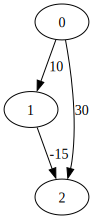

In [314]:
# Test Case 2
dot2 = Digraph()
dot2.edge('0', '1', label='10')
dot2.edge('1', '2', label='-15')
dot2.edge('0', '2', label='30')
dot2

### Test Case 3 - Negative Cycle

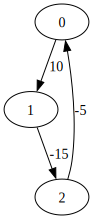

In [315]:
# Test Case 3
dot3 = Digraph()
dot3.edge('0', '1', label='10')
dot3.edge('1', '2', label='-15')
dot3.edge('2', '0', label='-5')
dot3

In [307]:
import unittest

class TestBellmanFord(unittest.TestCase):

    def test_positive_weights(self):
        G = Graph()
        for i in ['0', '1', '2']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], 10)
        G.addDiEdge(V[1], V[2], 20)
        G.addDiEdge(V[0], V[2], 30)
        expected_output = {V[0]: 0, V[1]: 10, V[2]: 30}
        self.assertDictEqual(bellman_ford(V[0], G), expected_output)

    def test_negative_weights(self):
        G = Graph()
        for i in ['0', '1', '2']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], 10)
        G.addDiEdge(V[1], V[2], -15)
        G.addDiEdge(V[0], V[2], 30)
        expected_output = {V[0]: 0, V[1]: 10, V[2]: -5}
        self.assertDictEqual(bellman_ford(V[0], G), expected_output)

    def test_negative_cycle(self):
        G = Graph()
        for i in ['0', '1', '2']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], 10)
        G.addDiEdge(V[1], V[2], -15)
        G.addDiEdge(V[2], V[0], -5)
        self.assertIsNone(bellman_ford(V[0], G))

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestBellmanFord)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_negative_cycle (__main__.TestBellmanFord.test_negative_cycle) ... ok
test_negative_weights (__main__.TestBellmanFord.test_negative_weights) ... ok
test_positive_weights (__main__.TestBellmanFord.test_positive_weights) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


Graph contains a negative-weight cycle


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### <font color='red'> Activity 2: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [308]:
import itertools
def Floyd_Warshall(G):
    # Initialize the distance matrix
    n = len(G.vertices)
    distance = [[float('inf') for _ in range(n)] for _ in range(n)]

    # Set the distance from a vertex to itself to 0
    for i in range(n):
        distance[i][i] = 0

    # Set the distance for each edge in the graph
    for u in G.vertices:
        for v, wt in u.getOutNeighborsWithWeights():
            distance[u.index][v.index] = wt

    # Compute the shortest path between all pairs of vertices
    for k in range(n):
        for i, j in itertools.product(range(n), range(n)):
            distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
        # Check for negative-weight cycle
        if any(distance[i][i] < 0 for i in range(n)):
            raise ValueError("Graph contains a negative-weight cycle")

    return distance

### Test Case 1 - Positive Weights

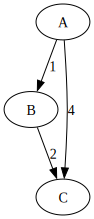

In [316]:
# dot1
dot1 = Digraph()
dot1.edge('A', 'B', label='1')
dot1.edge('B', 'C', label='2')
dot1.edge('A', 'C', label='4')
dot1

### Test Case 2 - Negative Weights

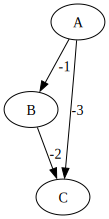

In [319]:
# dot2
dot2 = Digraph()
dot2.edge('A', 'B', label='-1')
dot2.edge('B', 'C', label='-2')
dot2.edge('A', 'C', label='-3')
dot2

### Test Case 3 - Negative Cycle

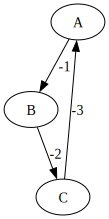

In [317]:
# dot3
dot3 = Digraph()
dot3.edge('A', 'B', label='-1')
dot3.edge('B', 'C', label='-2')
dot3.edge('C', 'A', label='-3')
dot3

In [309]:
import unittest

class TestFloydWarshall(unittest.TestCase):

    def test_positive_weights(self):
        G = Graph()
        for i in ['A', 'B', 'C']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], 1)
        G.addDiEdge(V[1], V[2], 2)
        G.addDiEdge(V[0], V[2], 4)
        expected_output = [[0, 1, 3], [float('inf'), 0, 2], [float('inf'), float('inf'), 0]]
        self.assertListEqual(Floyd_Warshall(G), expected_output)

    def test_negative_weights(self):
        G = Graph()
        for i in ['A', 'B', 'C']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], -1)
        G.addDiEdge(V[1], V[2], -2)
        G.addDiEdge(V[0], V[2], -3)
        expected_output = [[0, -1, -3], [float('inf'), 0, -2], [float('inf'), float('inf'), 0]]
        self.assertListEqual(Floyd_Warshall(G), expected_output)

    def test_negative_cycle(self):
        G = Graph()
        for i in ['A', 'B', 'C']:
            G.addVertex(Node(i))
        V = G.vertices
        G.addDiEdge(V[0], V[1], -1)
        G.addDiEdge(V[1], V[2], -2)
        G.addDiEdge(V[2], V[0], -3)
        self.assertRaises(ValueError, Floyd_Warshall, G)

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestFloydWarshall)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_negative_cycle (__main__.TestFloydWarshall.test_negative_cycle) ... ok
test_negative_weights (__main__.TestFloydWarshall.test_negative_weights) ... ok
test_positive_weights (__main__.TestFloydWarshall.test_positive_weights) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>